In [4]:
import numpy as np
from scipy import signal
import pandas as pd
import datetime
from matplotlib import pyplot as plt
import random
# start_time = datetime.datetime.now() 

n = 10000
m = int(n/10)
c = [0.5*i for i in range(10)]
re = []
for r in range(10):
    err_res = []
    for j in range(10):
        x = np.random.rand(n)
        x = np.sort(x)
        e = np.random.normal(0, 1, n)
        y = [e[i] if (x[i] <=0.25 or x[i]>=0.5) else 4*x[i]-1+e[i] for i in range(n)]
        res = []
        for a in range(-m,m):
            f = [0 if (x[i] <= (0.25+a/(10*n)) or x[i]>=(0.5+a/(10*n))) else 4*(x[i]-a/(10*n))-1 for i in range(n)]
            diff = sum([1-(1-((y[i]-f[i])/c[r])**2)**3 if abs(y[i]-f[i])<=c[r] else 1 for i in range(n)])
            res.append(diff)
        min_res = min(res)
        in_res = [i for i in range(2*m) if res[i]==min_res]
        lo_res = random.sample(in_res, 1)[0]
        err = (lo_res-m)/(10*n)
        err_res.append(err)
    re.append(np.sum([t**2 for t in err_res]))
    print(r)
c0 = re.index(min(re))
print(c0)

err_res = []
for j in range(200):
    x = np.random.rand(n)
    x = np.sort(x)
    e = np.random.normal(0, 1, n)
    y = [e[i] if (x[i] <=0.25 or x[i]>=0.5) else 4*x[i]-1+e[i] for i in range(n)]
    res = []
    for a in range(-m,m):
        f = [0 if (x[i] <= (0.25+a/(10*n)) or x[i]>=(0.5+a/(10*n))) else 4*(x[i]-a/(10*n))-1 for i in range(n)]
        diff = sum([1-(1-((y[i]-f[i])/c[c0])**2)**3 if abs(y[i]-f[i])<=c[c0] else 1 for i in range(n)])
        res.append(diff)
    min_res = min(res)
    in_res = [i for i in range(2*m) if res[i]==min_res]
    lo_res = random.sample(in_res, 1)[0]
    err = (lo_res-m)/(10*n)
    err_res.append(err)
#     print(j)

with open("Template E_normal1_tukey_10000_200.txt", "w") as f:
    for s in err_res:
        f.write(str(s) +"\n")   
        
# score = []
# with open("file.txt", "r") as f:
#     for line in f:
#         score.append(float(line.strip()))
    
# end_time = datetime.datetime.now()     
# interval = (end_time-start_time).seconds
# final_time = interval/60.0 
# print ('Time:\t', final_time)   

0
1
2
3
4
5
6
7
8
9
9


(array([  2.,   1.,   7.,  12.,  46., 106.,  16.,   6.,   3.,   1.]),
 array([-0.00274 , -0.002228, -0.001716, -0.001204, -0.000692, -0.00018 ,
         0.000332,  0.000844,  0.001356,  0.001868,  0.00238 ]),
 <a list of 10 Patch objects>)

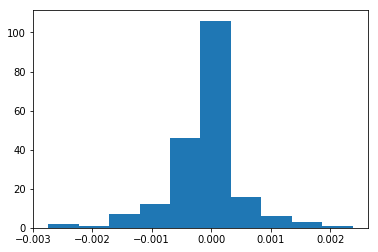

In [5]:
from matplotlib import pyplot as plt
score = []
with open("Template E_normal1_tukey_10000_200.txt", "r") as f:
    for line in f:
        score.append(float(line.strip()))
        
plt.hist(score)

In [6]:
import numpy as np
np.mean([abs(i) for i in score])

0.0004008